# Вводная часть: исследование о продажах игр 
В нашем распоряжении данные создания игр по годам,  сумме полученной прибыли от проданных игр на различных платформах с 1980 по 2016 года. Наша задача — найти самые популярные платформы, определить среднюю продолжительность жизни платформ. Посмотреть, как менялась их прибыть по годам, выбрать актуальный период и построить прогноз на 2017 год. Посмотреть зависимость покупки игр от рейтинга критиков и пользователей. Так же найдем самые популярные жанры, платформы, рейтинг в зависимости от места проживания. Найдем игр с какими жанрами выходят более всего. Выдвинем гипотезы о сравнении двух платформ и сравнении двух жанров игр



In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Шаг 1. Откроем файл с данными и изучите общую информацию

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


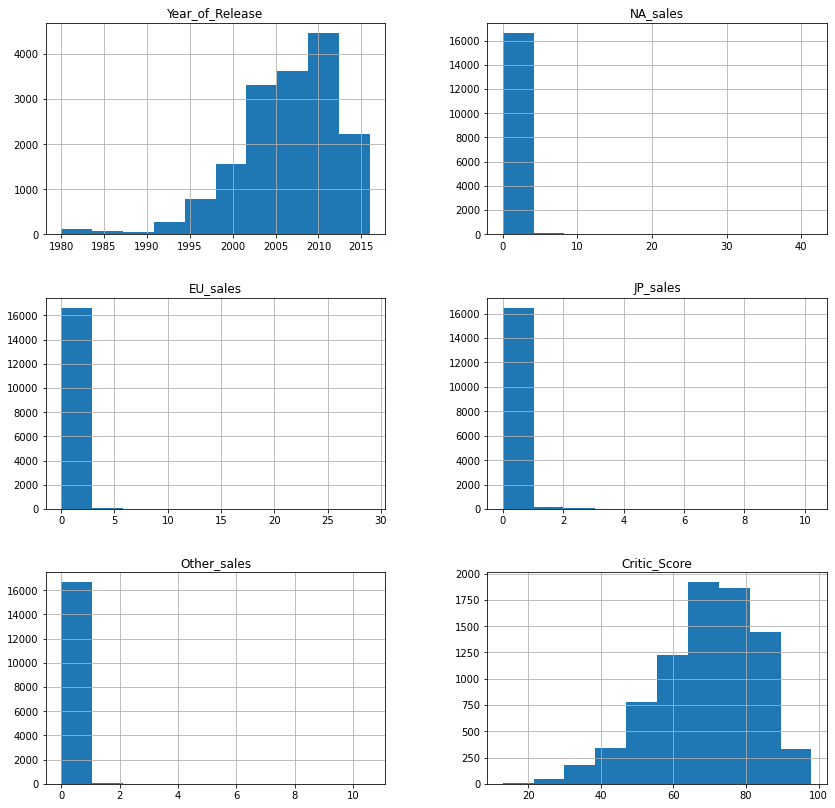

In [5]:
data.hist(figsize=(14,14));

Перед нами данные по играм. посмотрим какие платформы самые популярные, составим прогноз на 2017 год. какие жанры в играх предпочтительнее в зависимости от своего региона. составим гипотезы

# Шаг 2. Подготовим данные

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#приведем название колонок к нижнему регистру

data.columns = data.columns.str.lower() 

#в колонках приведем данные к нижнему регистру

data['platform']=data['platform'].str.lower()

data['name']=data['name'].str.lower()

data['genre']=data['genre'].str.lower()

In [8]:
#явные дубликаты
data.duplicated().sum()

0

In [9]:
#найдем пропуски. 
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
#найдем пропуски в названии игр
data.isna().query('name==True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,True,False,False,True,False,False,False,False,True,True,True
14244,True,False,False,True,False,False,False,False,True,True,True


In [11]:
#выведем строки с пропусками
data.loc[[659,14244],:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


по этим двум строчкам мы не знаем название игр, жанр, пропуски на месте рейтинга. если игра с индексом 14244 почти не принесли прибыли. то игра с индексом 659 принесла прибыль, которая превышает среднюю в 5 раз. но из-за пропусков почти по всех столбцах для анализа они нам бесполезны

In [12]:
#удалили пропуски в названии игр и жанре
data=data.dropna(subset=['name'])
data=data.reset_index(drop=True)

Пропуски в годах можно заменить медийным значение с зависимости от типа игровой платформы.


In [13]:
#пропуски в годах замениv медийным значениеv с зависимости от типа игровой платформы
for i in data['platform'].unique():
    data.loc[(data['platform']==i) & (data['year_of_release'].isna()),'year_of_release'] = data.loc[(data['platform']==i),'year_of_release'].median()


In [14]:
#в столбще rating пропуски заменим на not_raning
data['rating']=data['rating'].fillna('not_rating')

In [15]:
# столбец года меняем на тип int
# столбцы platform, genre, name меняем на string
data['name']=data['name'].astype('string')
data['platform']=data['platform'].astype('string')
data['genre']=data['genre'].astype('string')
data['year_of_release']=data['year_of_release'].astype('int32')

In [16]:
#найдем процент пропусков
data.isna().mean()*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating              0.000000
dtype: float64

Вывод: в столбцах с рейтингом игр в поливине значений пропуски, заменять их нельзя т.к. количество пропусков очень большое, даже если их было бы меньше рейтинг у игр может быть абсолютно разный для замены средним или медийным значение. так же если удалить данные с пропусками, то мы потеряем больше половины данных. Оставляем пропуски без изменений

# Шаг 3. Анализ данных

### добавим столбец суммарных продаж

In [17]:
data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

### найдем топ самых прибыльных платформ, посмотрим сколько игр выходило ежегодно, найдем года,когда начали выходить игры на топ платформ

In [18]:
#найдем платформы на которых было продано больше всего игр
data.pivot_table(index='platform', values='sum_sales',aggfunc='sum').sort_values(by='sum_sales',ascending=False).head(10)

,sum_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


In [19]:
# посмотрим сколько игр выходило в каждый год по жанрам
data.pivot_table(index='year_of_release',columns='genre', values='name',aggfunc='count')

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
year_of_release,,,,,,,,,,,,
1980,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
1981,25.0,NaN,NaN,NaN,3.0,2.0,1.0,NaN,10.0,1.0,4.0,NaN
1982,24.0,1.0,1.0,1.0,5.0,6.0,4.0,NaN,7.0,NaN,4.0,NaN
1983,7.0,1.0,NaN,1.0,5.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
1984,1.0,NaN,NaN,1.0,1.0,3.0,3.0,NaN,3.0,NaN,2.0,NaN
1985,2.0,NaN,1.0,NaN,4.0,4.0,NaN,NaN,1.0,1.0,1.0,NaN
1986,6.0,NaN,NaN,NaN,6.0,NaN,1.0,1.0,4.0,NaN,3.0,NaN
1987,2.0,1.0,2.0,NaN,2.0,NaN,NaN,3.0,2.0,NaN,4.0,NaN
1988,2.0,NaN,NaN,NaN,4.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN


In [20]:
data['name'].value_counts()

need for speed: most wanted                                  12
lego marvel super heroes                                      9
fifa 14                                                       9
ratatouille                                                   9
madden nfl 07                                                 9
                                                             ..
my fitness coach 2: exercise and nutrition                    1
foster's home for imaginary friends: imagination invaders     1
ro-kyu-bu! lost secret                                        1
gex                                                           1
battle of giants: mutant insects                              1
Name: name, Length: 11559, dtype: Int64

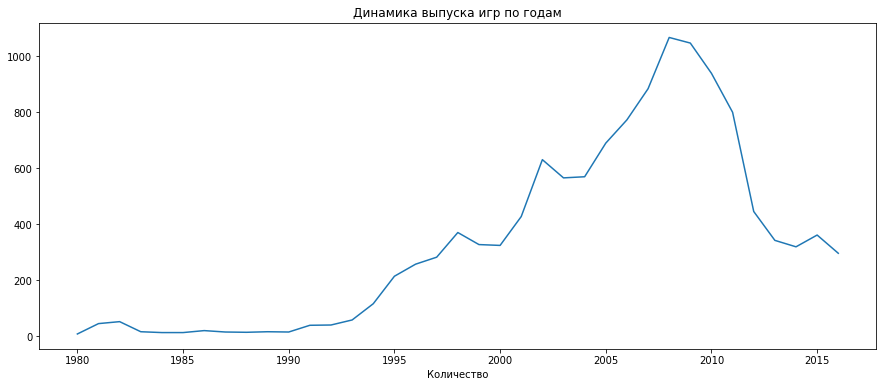

In [21]:
data.groupby(by='year_of_release')['name'].nunique().plot(figsize=(15,6))
plt.title('Динамика выпуска игр по годам')
plt.xlabel('Года')
plt.xlabel('Количество')
plt.show()

In [22]:
#посмотрим, когда начали выходить игры на самых популярных платформах
data.pivot_table(index='year_of_release',columns=['platform'],values='sum_sales',aggfunc='sum')[['ps2','x360','ps3','wii','ds','ps']]

platform,ps2,x360,ps3,wii,ds,ps
year_of_release,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,0.02,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN


Вывод: игры на самых популярных платформах начали выходить с начала 1994 годов. сильный скачек по играм начался с 1994 года. оставим данные начиная с 1994 года. Больше всего игр выходило в промежутке с 2005 по 2011 года. ps2, x360, ps3, wii, ds, ps - самые популярные платформы. В 1985 году вышло несколько игр на ds, для анализа нам эти данные не нужны

In [23]:
data_after_1993=data.query('year_of_release>1993')

### посмотрим, как менялись продажи по платформам их рост и падение

In [24]:
#построим сводную таблицу и покажем наш топ-6
data_top=data_after_1993.pivot_table(index='platform',columns='year_of_release',values='sum_sales',aggfunc='sum')
data_top

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3do,0.02,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,57.76,43.76,27.78,15.14
dc,NaN,NaN,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.94,148.65,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
gb,12.18,3.60,36.03,7.40,26.90,38.00,19.76,9.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gba,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,61.64,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.34,51.81,52.81,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gen,8.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n64,NaN,NaN,34.10,39.50,49.24,58.54,33.97,3.25,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


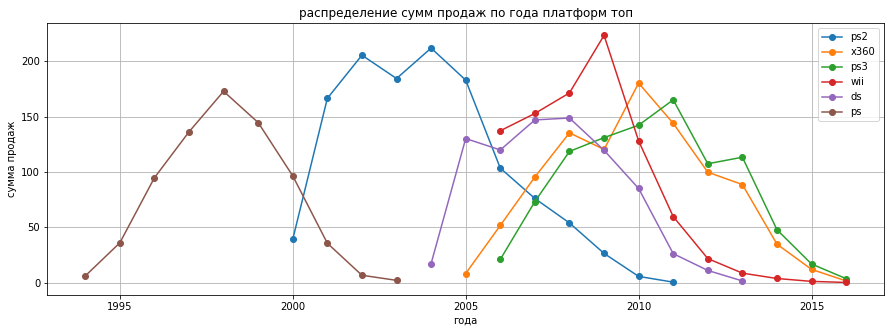

In [25]:
#построим график продаж по платформам топ
for i in ['ps2','x360','ps3','wii','ds','ps']:
    data_top.loc[i].plot(xlabel='года', ylabel='сумма продаж',grid=True,style='o-',figsize=(15,5), legend=True, title='распределение сумм продаж по года платформ топ')

In [26]:
#посмотрим сколько лет выходили игры на популярных платформах
data_after_1993.pivot_table(index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')\
[['ps2','x360','ps3','wii','ds','ps']].count()


platform
ps2     12
x360    12
ps3     11
wii     11
ds      10
ps      10
dtype: int64

Вывод: с появлением ps количество игр и собственно продаж начало резко увеличиваться, после выхода второй версии, продажи на первую начали падать, а продажи ps2 начали рости. в промежутке с 2005 по 2011 года(больше всего вышло игр), появилось много конкурентов(x360, wii, ds), поэтому продажи начали падать, а так же вышла третья версия ps3. вывод, после выхода новой более современной платформы спрос на старые версии падает. средний срок существования консоли 11 лет. wii продажи в 2016 практически на нуле(0.18). x360 и ps3 у них вышли новые версии, выход новых игр в следующем году маловероятен 

### Составим прогноз за 2017 год

возьмем последние 4 года и посмотрим график продаж по платформам

In [27]:
#сделаем выборку за последние 4 года
data_2017=data.query('year_of_release>2012')
#сделаем сводную таблицу
data_2017_pivot=data_2017.pivot_table(index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')
#через columns взяли столбцы и убрали те, в которых NaN в 2016 году. т.к. на них перестали выпускать игры
data_2017_pivot[['3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu','x360', 'xone']]

platform,3ds,pc,ps3,ps4,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,
2013,57.76,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,12.16,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


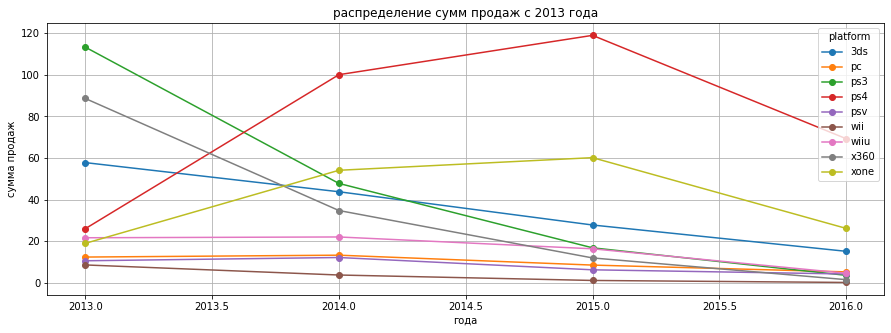

In [28]:
#построим график продаж по платформам для анализа
data_2017_pivot[['3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu',
       'x360', 'xone']].plot(xlabel='года', ylabel='сумма продаж',grid=True,style='o-',figsize=(15,5), legend=True, title='распределение сумм продаж с 2013 года');

In [29]:
data_2017.pivot_table(index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')\
[['ps4','xone']].count()

platform
ps4     4
xone    4
dtype: int64

Вывод: как по таблице, так и по графику видно, что продажи падают у всех платформ. на платформах ps4 и xone продажи выше чем у остальных, но в 2016 заметнее ниже, чем в 2015. из предыдущего графика мы выяснили, что срок жизни платформ в среднем 11 лет. на 2016 год платформы существуют меньше половины от среднего, и  что не все данные за 2016 год. думаю продажи платформ в 2017 будут не ниже уровня 2016 года в данный момент.

### Построим "ящик с усами" в разбивке по каждой платформе

(0.0, 2.0)

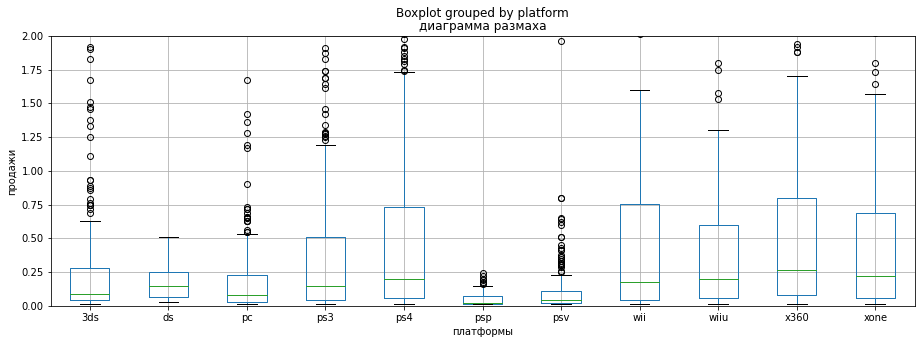

In [30]:
data_2017[['platform','sum_sales']].boxplot(by='platform',figsize=(15,5));
plt.title('диаграмма размаха')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.ylim(0,2)

Вывод: очень большое количество выбросов в каждой платформе. это говорит, что игр выходит очень много, а выбросы это игры,  которые покупаются в больших количествах.  медийное значение, говорит о покупке различних игр на той или иной платформе, т.е. чем выше медийное значение, тем больше различных игр покупают на этой платформе

### Посмотрим на общее распределение игр по жанрам

In [31]:
s1=data_2017.pivot_table(index='genre',values='sum_sales',aggfunc=['sum','count','median','mean'])#.sort_values(by='sum_sales',ascending=False)
s1.columns=['sum','count','median','mean']
s1.sort_values(by='sum',ascending=False)

,sum,count,median,mean
genre,,,,
action,322.27,767,0.110,0.420169
shooter,233.05,188,0.445,1.239628
sports,150.67,215,0.240,0.700791
role-playing,146.18,294,0.125,0.497211
misc,62.82,155,0.100,0.405290
platform,42.63,74,0.225,0.576081
racing,39.98,86,0.115,0.464884
fighting,35.31,80,0.125,0.441375
adventure,23.73,246,0.030,0.096463


(0.0, 3.5)

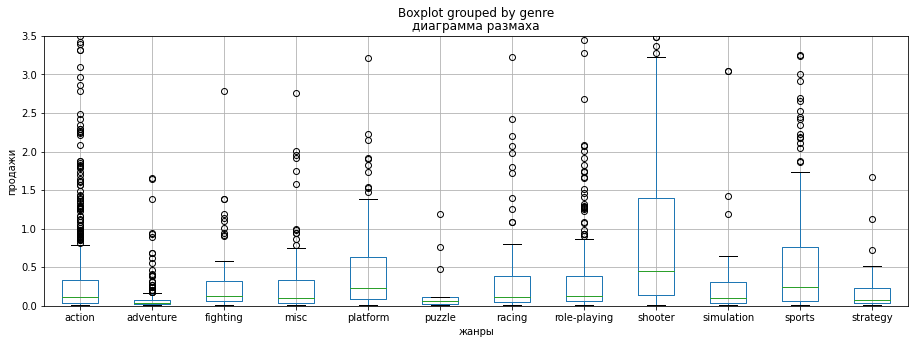

In [32]:
data_2017[['genre','sum_sales']].boxplot(by='genre',figsize=(15,5));
plt.title('диаграмма размаха')
plt.xlabel('жанры')
plt.ylabel('продажи')
plt.ylim(0,3.5)

Вывод: 3 самых покупаемых жанра **action**, **shooter**, **sport**. если мы посмотрим на таблицу и boxplot, то можно увидеть:  **action** есть выбросы, но квантили и медийное значение маленькое, это значит, что игр выходит очень много с этим жанром, но большинство из них имеют низкие продажи. **shooter** квантили и медийное значение самое высокое, различные игр с этим жанром пользуются спросом у покупателей.  **sport** квантили и медиана меньше, чем у shooter, но выше чем у action и так же пользуются спросом


### Посмотрим, как продажи самой популярной платформы влияют от отзывов критиков и пользователей

In [33]:
#найдем платформу на которую было продано больше всего игр
data_2017.pivot_table(index='platform', values='sum_sales',aggfunc='sum').sort_values(by='sum_sales',ascending=False).head(5)

,sum_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,144.44
x360,136.80


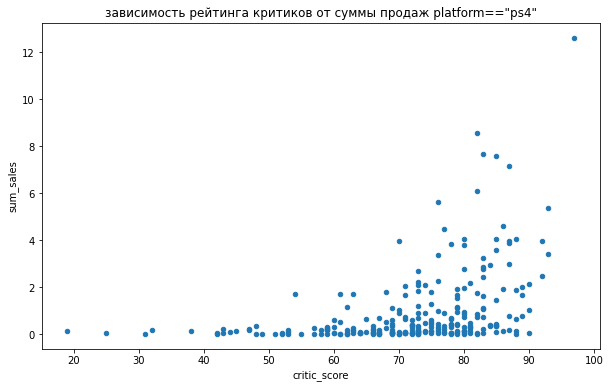

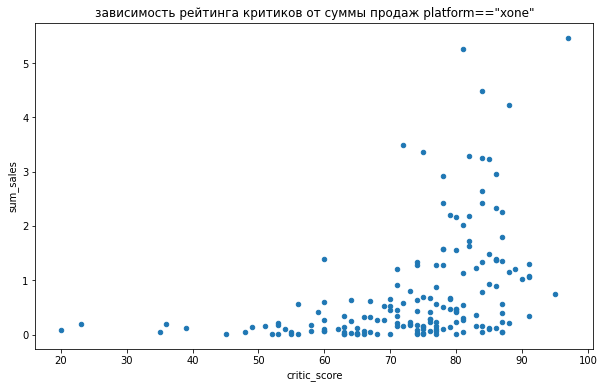

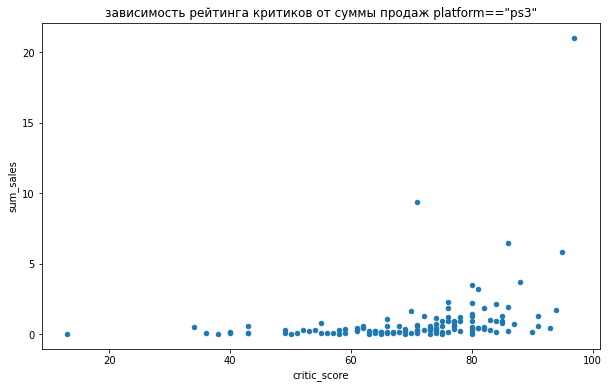

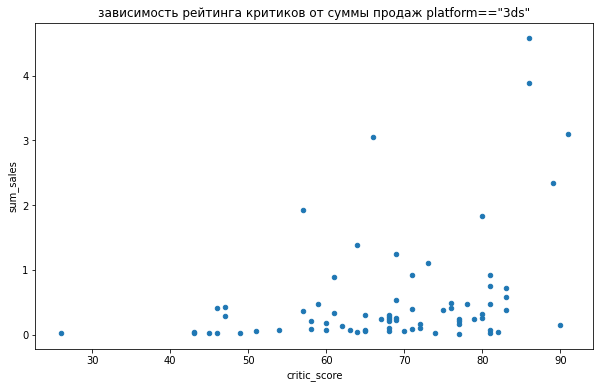

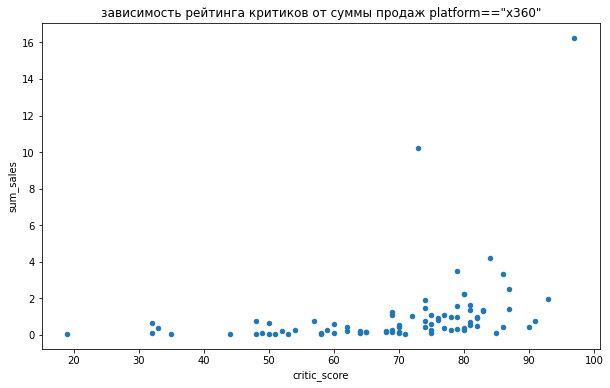

In [34]:
#график рассеяния критиков от продаж 
data_2017.query('platform=="ps4"').plot(kind='scatter', x='critic_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга критиков от суммы продаж platform=="ps4"');
data_2017.query('platform=="xone"').plot(kind='scatter', x='critic_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга критиков от суммы продаж platform=="xone"');
data_2017.query('platform=="ps3"').plot(kind='scatter', x='critic_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга критиков от суммы продаж platform=="ps3"');
data_2017.query('platform=="3ds"').plot(kind='scatter', x='critic_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга критиков от суммы продаж platform=="3ds"');
data_2017.query('platform=="x360"').plot(kind='scatter', x='critic_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга критиков от суммы продаж platform=="x360"');


In [35]:
#корреляция критиков от продаж platform=="ps4"
data_2017.query('platform=="ps4"')['critic_score'].corr(data_2017.query('platform=="ps4"')['sum_sales'])

0.40656790206178095

In [36]:
#корреляция критиков от продаж platform=="xone"
data_2017.query('platform=="xone"')['critic_score'].corr(data_2017.query('platform=="xone"')['sum_sales'])

0.4169983280084017

In [37]:
#корреляция критиков от продаж platform=="ps3"
data_2017.query('platform=="ps3"')['critic_score'].corr(data_2017.query('platform=="ps3"')['sum_sales'])

0.3342853393371919

In [38]:
#корреляция критиков от продаж platform=="3ds"
data_2017.query('platform=="3ds"')['critic_score'].corr(data_2017.query('platform=="3ds"')['sum_sales'])

0.3610077809590907

In [39]:
#корреляция критиков от продаж platform=="x360"
data_2017.query('platform=="x360"')['critic_score'].corr(data_2017.query('platform=="x360"')['sum_sales'])

0.3503445460228664

TBD это игр, рейтин которых еще не известен,
либо вышел только анонс игры 
либо если у них готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущен.
в теории это тот же самый NaN

In [40]:
#исключим tbd и пропуски(не нужны при проверки гипотез) для изменения типа данных на float и проверки корреляции
data_user=data_2017.query('user_score!="tbd"')
data_user=data_user.dropna(subset=['user_score'])
data_user['user_score']=pd.to_numeric(data_user['user_score'],errors='ignore')

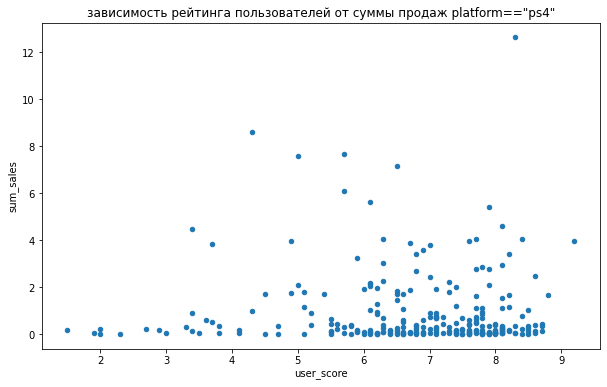

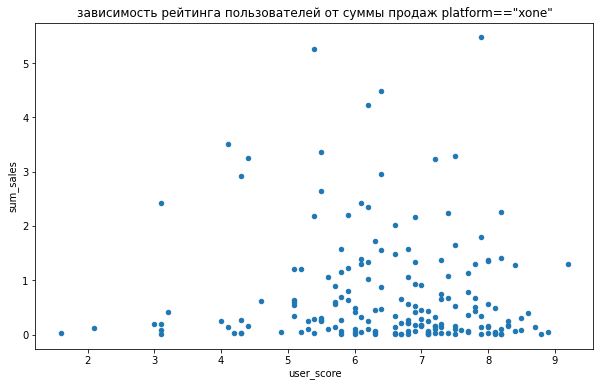

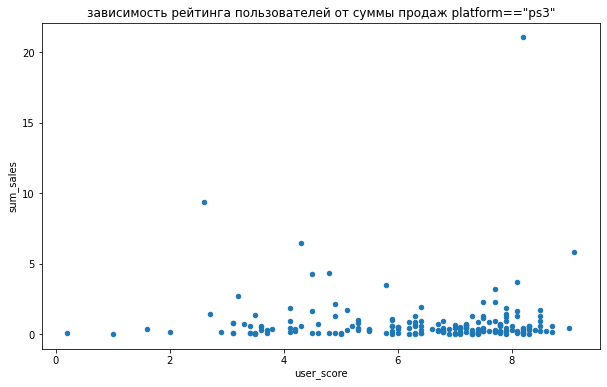

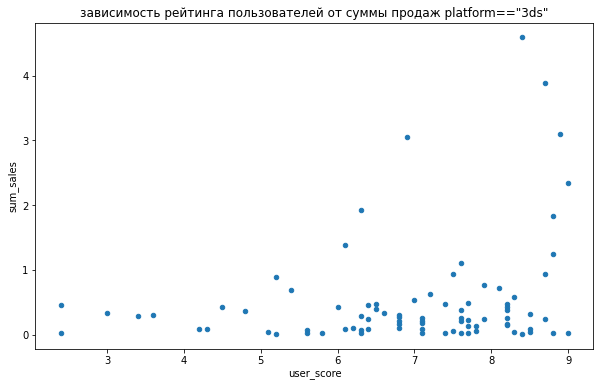

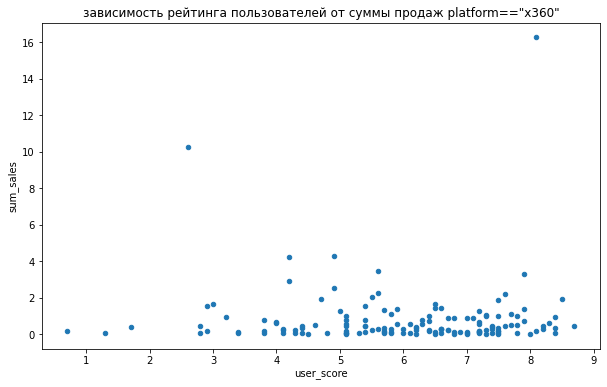

In [41]:
#график рассеяния критиков от продаж 
data_user.query('platform=="ps4"').plot(kind='scatter', x='user_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга пользователей от суммы продаж platform=="ps4"');
data_user.query('platform=="xone"').plot(kind='scatter', x='user_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга пользователей от суммы продаж platform=="xone"');
data_user.query('platform=="ps3"').plot(kind='scatter', x='user_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга пользователей от суммы продаж platform=="ps3"');
data_user.query('platform=="3ds"').plot(kind='scatter', x='user_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга пользователей от суммы продаж platform=="3ds"');
data_user.query('platform=="x360"').plot(kind='scatter', x='user_score', y='sum_sales',figsize=(10,6), title='зависимость рейтинга пользователей от суммы продаж platform=="x360"');

In [42]:
#корреляция пользователей от продаж platform=="ps4"
data_user.query('platform=="ps4"')['user_score'].corr(data_user.query('platform=="ps4"')['sum_sales'])

-0.031957110204556376

In [43]:
#корреляция пользователей от продаж platform=="xone"
data_user.query('platform=="xone"')['user_score'].corr(data_user.query('platform=="xone"')['sum_sales'])

-0.06892505328279414

In [44]:
#корреляция пользователей от продаж platform=="ps3"
data_user.query('platform=="ps3"')['user_score'].corr(data_user.query('platform=="ps3"')['sum_sales'])

0.0023944027357566925

In [45]:
#корреляция пользователей от продаж platform=="3ds"
data_user.query('platform=="3ds"')['user_score'].corr(data_user.query('platform=="3ds"')['sum_sales'])

0.2503662158651731

In [46]:
#корреляция пользователей от продаж platform=="x360"
data_user.query('platform=="x360"')['user_score'].corr(data_user.query('platform=="x360"')['sum_sales'])

-0.011742185147181342

Вывод: по графику и корреляции критиков от сумм продаж видна зависимомть покупки игр от оценки критиков, больше всего корреляция на новых платформах  ps4 и xone. по графику и корреляции пользователей от сумм продаж зависимости покупки игр от оценки пользователей НЕТ

### Составим портрет пользователя каждого региона.найдем самые популярные платформы и жанры(топ-5). проверим влияет ли рейтинг ESRB на продажи 

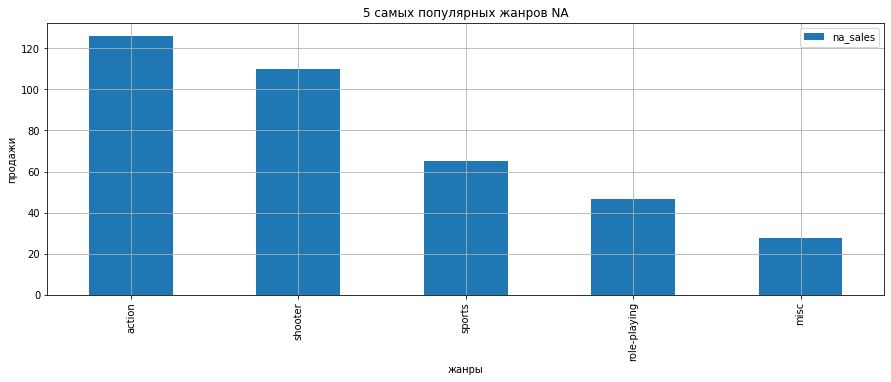

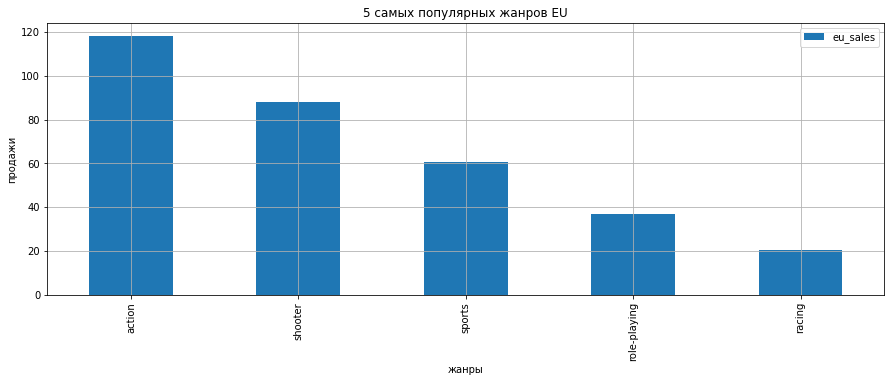

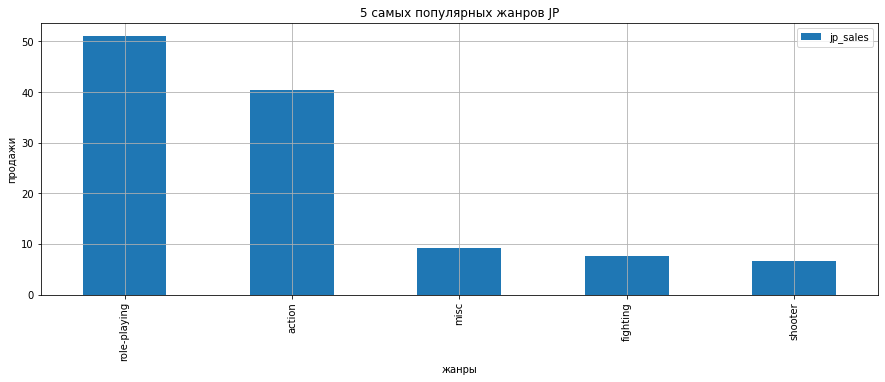

In [47]:
data_2017.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных жанров NA')
plt.xlabel('жанры')
plt.ylabel('продажи')
data_2017.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных жанров EU')
plt.xlabel('жанры')
plt.ylabel('продажи')
data_2017.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных жанров JP')
plt.xlabel('жанры')
plt.ylabel('продажи')
plt.show()

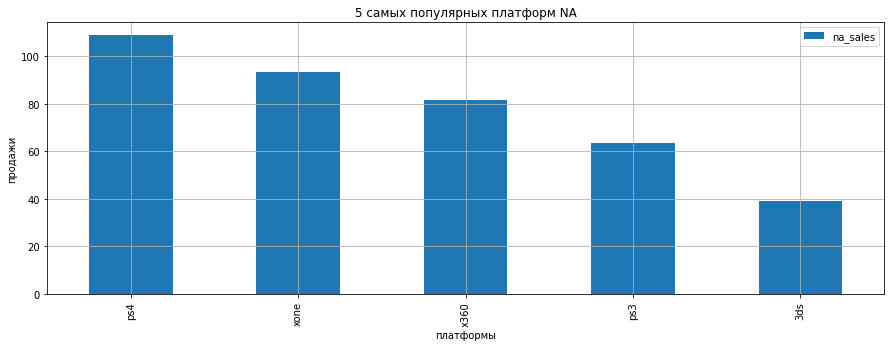

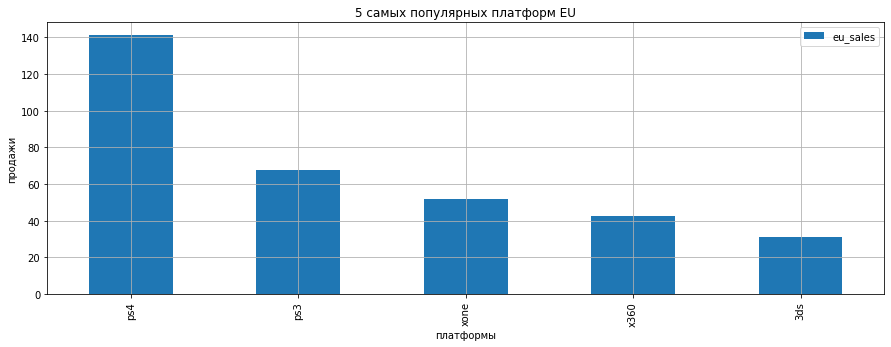

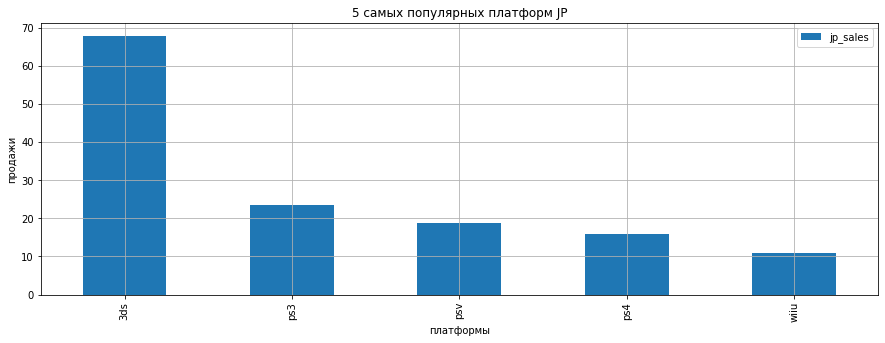

In [48]:
data_2017.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных платформ NA')
plt.xlabel('платформы')
plt.ylabel('продажи')
data_2017.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных платформ EU')
plt.xlabel('платформы')
plt.ylabel('продажи')
data_2017.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных платформ JP')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.show()

Вывод:  в Европе  и Америке самой популярной платформой является ps4. в японии 3ds

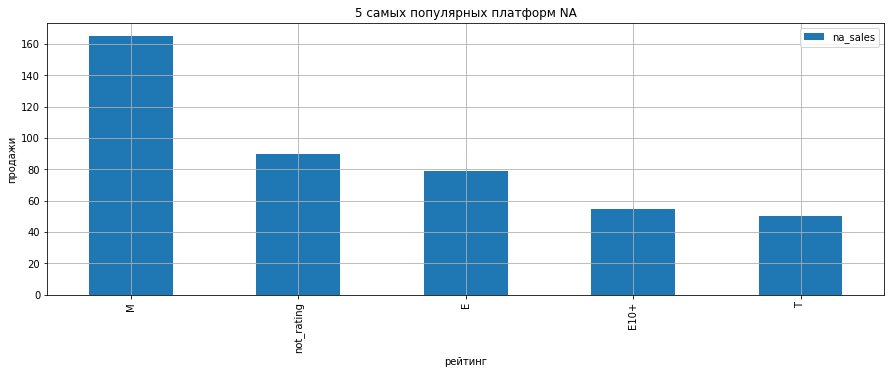

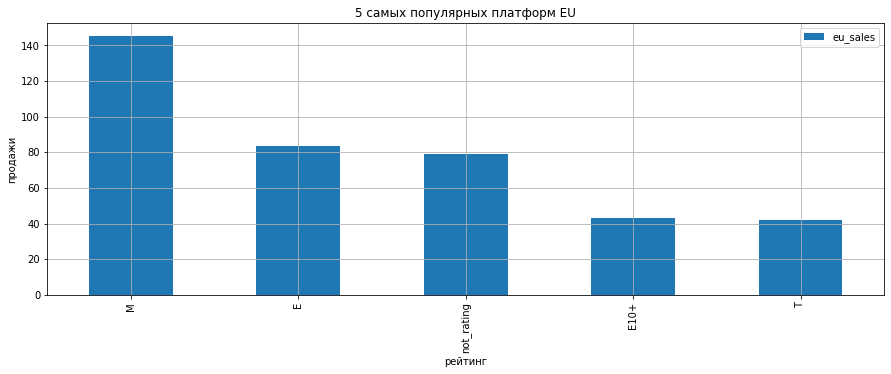

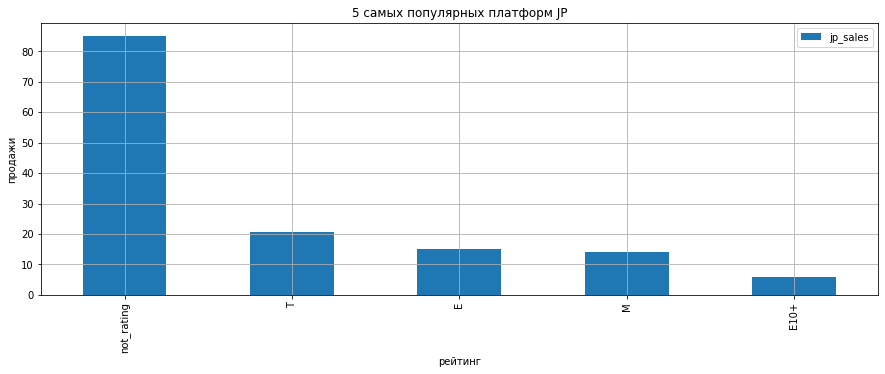

In [49]:
data_2017.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных платформ NA')
plt.xlabel('рейтинг')
plt.ylabel('продажи')
data_2017.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных платформ EU')
plt.xlabel('рейтинг')
plt.ylabel('продажи')
data_2017.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5).plot(kind='bar',figsize=(15,5),grid=True,title='5 самых популярных платформ JP')
plt.xlabel('рейтинг')
plt.ylabel('продажи')
plt.show()

Вывод: Распределение по жанрам у Европы и Америки  примерно одинаковое action, shooter, sport, в японии 2 самых популярных жанра role-playing и action. В Европе и Америке самой популярной платформой является ps4, в японии 3ds.
Рейтинги и продажи в Европе и Америке респределились примерно одинаково предпочитают рейтинг "М". В Японии покупают очень много игр без рейтинга

# Шаг 4. Проверим гипотезы:

первая гипотеза:

Но=средние пользовательские рейтинги платформ xone и pc одинаковые

Н1=средние пользовательские рейтинги платформ xone и pc не равны

In [50]:
data_xone=data_user.query('platform=="xone"')
data_pc=data_user.query('platform=="pc"')
alpha=0.05
results=st.ttest_ind(data_xone['user_score'],data_pc['user_score'],equal_var=False) #дисперсии разные поэтому equal_var=False
results.pvalue
print(results.pvalue)
if results.pvalue<alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не получится отвергнуть')

0.14759594013430463
не получится отвергнуть


вторая гипотеза:

Но=средние пользовательские рейтинги жанров action и sports одинаковые

Н1=средние пользовательские рейтинги жанров action и sports разные

In [51]:
data_action=data_user.query('genre=="action"')
data_sports=data_user.query('genre=="sports"')
alpha=0.05
results=st.ttest_ind(data_action['user_score'],data_sports['user_score'],equal_var=False) #дисперсии разные поэтому equal_var=False
results.pvalue
print(results.pvalue)
if results.pvalue<alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не получится отвергнуть')

1.4711831608728666e-20
отвергаем нулевую гипотезу


# Шаг 5. Общий вывод:
В нашем распоряжении были данные о создании игр по годам, сумме полученной прибыли от проданных игр на различных платформах с 1980 по 2016 года. Мы нашли самые популярные платформы, определили их среднюю продолжительность жизни(11 лет). Выбрали актуальные года(2013-2016) и посмотрели, как менялась прибыть популярных платформ того времени по годам, построили прогноз на 2017 год. посмотрели зависимость покупки игр от рейтинга критиков(она есть). Зависимости рейтинга пользователей от покупки игр нет. Так же нашли самые популярные платформы, жанры, рейтинги в зависимости от места проживания. Распределение по жанрам у Европы и Америки примерно одинаковое action, shooter, sport, в Японии 2 самых популярных жанра role-playing и action. В Европе и Америке самой популярной платформой является ps4, в Японии 3ds. Рейтинги и продажи в Европе и Америке распределились примерно одинаково предпочитают рейтинг "М". Больше всего игр выходит с жанром action, большее из которых с низкими продажами. В Японии покупают очень много игр без рейтинга. Выдвинули гипотезы о сравнении двух платформ и сравнении двух жанров игр



